# Crie um Jupyter Notebook (NB) para exibir as imagens, organizadas pelas classes. Dica: skimage.util.montage

In [13]:
#Clonando o projeto
!rm -rf digital-image-processing
!git clone https://github.com/Menkallinan/digital-image-processing.git

Cloning into 'digital-image-processing'...
remote: Enumerating objects: 416, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 416 (delta 0), reused 6 (delta 0), pack-reused 409 (from 1)
Receiving objects: 100% (416/416), 471.73 MiB | 37.68 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (165/165), done.


In [10]:
!git clone https://github.com/Menkallinan/digital-image-processing.git

fatal: destination path 'digital-image-processing' already exists and is not an empty directory.


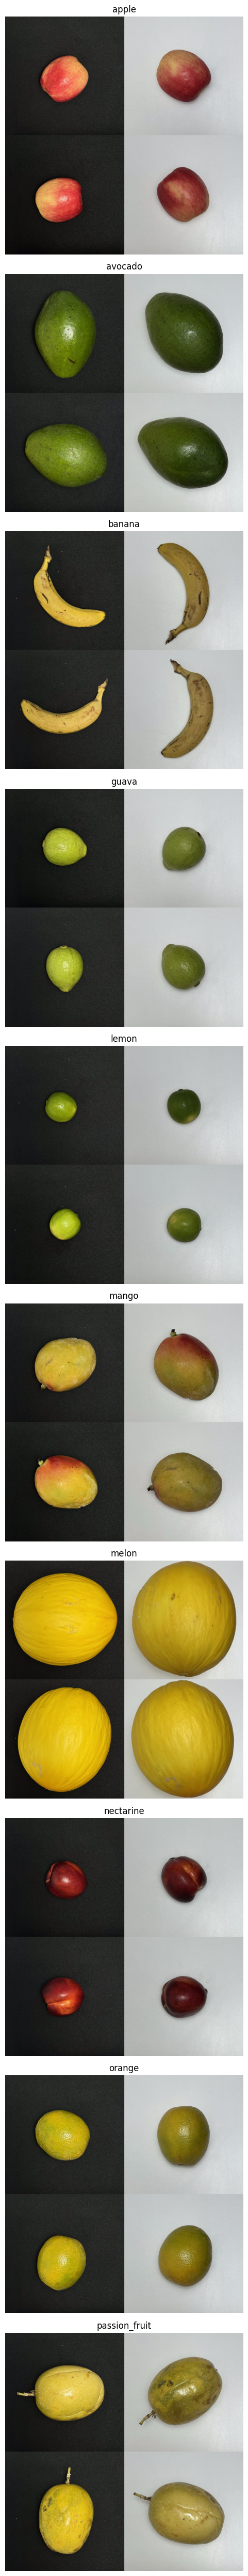

In [14]:
import os
import numpy as np
import skimage.io
import skimage.util
from matplotlib import pyplot as plt

# Diretório base para as frutas
base_dir = "digital-image-processing/project/project_part1/fruits"

# Classes de frutas (subdiretórios)
ft_class = ['apple', 'avocado', 'banana', 'guava', 'lemon', 'mango', 'melon', 'nectarine', 'orange', 'passion_fruit']

# Versões e cores
ft_version = ['V1', 'V2']  # Versões das imagens
ft_color = ['B', 'W']  # Cores B (colorido) e W (preto e branco)

fig, axes = plt.subplots(10, 1, figsize=(50, 50))
ax = axes.ravel()

for i, fruit in enumerate(ft_class, start=1):  # O índice começa em 1
    img_fruit = []
    for ver in ft_version:
        for col in ft_color:
            # Montar o caminho para a imagem de cada fruta, versão e cor
            img_path = f'{base_dir}/{fruit}/0-{str(i).zfill(2)}-{ver}-{col}.png'

            # Verifica se o arquivo existe antes de carregar
            if os.path.exists(img_path):
                #print(f"Carregando imagem: {img_path}")  # Depuração
                img = skimage.io.imread(img_path)

                # Se a imagem for em escala de cinza (2D), converte para 3 canais
                if img.ndim == 2:  # Para imagens em preto e branco
                    img = np.stack([img] * 3, axis=-1)
                elif img.ndim == 3 and img.shape[-1] == 4:  # Para imagens com canal alpha
                    img = img[..., :3]  # Ignora o canal alpha

                img_fruit.append(img)
            else:
                print(f"Arquivo não encontrado: {img_path}")  # Depuração

    if img_fruit:  # Só monta se houver imagens
        # Converter lista de imagens para um array numpy
        img_fruit_array = np.array(img_fruit)

        # Criando montagem das imagens, especificando o channel_axis para lidar com imagens coloridas
        m = skimage.util.montage(img_fruit_array, channel_axis=-1)
        ax[i-1].imshow(m)  # Mostra a imagem no subplot
        ax[i-1].set_axis_off()
        ax[i-1].set_title(f"{fruit}")
    else:
        print(f"Nenhuma imagem carregada para {fruit}")  # Depuração

fig.tight_layout()
plt.show()


# Crie uma função para exibir os metadados.

In [16]:
import pandas as pd

def show_csv_content(file_path):
    try:
        # Read the CSV file using pandas
        df = pd.read_csv(file_path)

        # Show the content of the CSV file
        print(df)
    except FileNotFoundError:
        print(f"The file {file_path} was not found.")
    except pd.errors.EmptyDataError:
        print("The file is empty.")
    except pd.errors.ParserError:
        print("Error parsing the file. Check the CSV format.")

# Example usage
show_csv_content('/content/digital-image-processing/project/project_part1/metadata/fruit_metadata.csv')


    Index          Fruit  Width  Height Format Background Vision Image Name
0       1          apple   1000    1000    PNG      Black     V1  0-01-V1-B
1       1          apple   1000    1000    PNG      White     V1  0-01-V1-W
2       1          apple   1000    1000    PNG      Black     V2  0-01-V2-B
3       1          apple   1000    1000    PNG      White     V2  0-01-V2-W
4       2        avocado   1000    1000    PNG      Black     V1  0-02-V1-B
5       2        avocado   1000    1000    PNG      White     V1  0-02-V1-W
6       2        avocado   1000    1000    PNG      Black     V2  0-02-V2-B
7       2        avocado   1000    1000    PNG      White     V2  0-02-V2-W
8       3         banana   1000    1000    PNG      Black     V1  0-03-V1-B
9       3         banana   1000    1000    PNG      White     V1  0-03-V1-W
10      3         banana   1000    1000    PNG      Black     V2  0-03-V2-B
11      3         banana   1000    1000    PNG      White     V2  0-03-V2-W
12      4   